Perform a more in-depth exploratory analysis of the data, and visualize variables that you think are relevant for the overall project goals. In particular, for events in the 5 most frequent categories:
- visualize their evolution on different time scales (year, month, week, day, hour). Do you see any periodic patterns?
- study the distribution of event status and source for these categories.

Plot the geographic distribution of the 5 most frequent categories on a map for a given date.
- You can use the ipyleaflet library. If too many events are displayed on the map, you can use MarkerCluster class to group them.
- (optional) Make an interactive Jupyter widget, where the events on the map can be updated with a dropdown menu listing the 5 most frequent categories. You can, for instance, adapt this ipyleaflet example.

Compute the city neighborhood name for each event location.
- First download a GeoJSON with San Francisco neighborhood information. It can be downloaded here using the urllib.request module, then loaded with the json module.
- The boundaries of each neighborhood are stored under the coordinates key in the resulting nested dictionary. For each neighborhood, extract its name and convert the neighborhood boundary to a (n_points, 2) numpy array.
- For each GPS coordinates of an event, we then need to identify which city neighborhood it belongs to, and create a new column neighborhood with the corresponding values. This can be done using the matplotlib.path.Path.contains_points method, between the neighborhood boundaries and the event coordinates. It is acceptable if the neighborhood for a small fraction of events cannot be determined.

Save the resulting dataset with the added neighborhood column to a safety-SanFrancisco-2.parquet file.

In [46]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import path
import seaborn as sns
%matplotlib inline
#from ipyleaflet import Map, Marker, MarkerCluster
import json
import numpy as np
sns.set()
pd.set_option('display.max_rows', None)

In [47]:
directory = os.getcwd()


In [48]:
#out = os.path.basename("/baz/foo") 
directory = str(os.getcwd())+'/files/'
filename = 'cleaned_safety-SanFrancisco.parquet'
df = pd.read_parquet(directory+filename)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221561 entries, 0 to 3221560
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   requestId    int64         
 1   dataSubtype  category      
 2   dateTime     datetime64[ns]
 3   category     category      
 4   subcategory  object        
 5   status       category      
 6   address      object        
 7   latitude     float64       
 8   longitude    float64       
 9   source       category      
dtypes: category(4), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 159.8+ MB


In [50]:
df.category.value_counts(dropna=False).to_frame()

,category
Street and Sidewalk Cleaning,965429
Potentially Life-Threatening,297049
Graffiti,296736
Encampments,239153
Non Life-threatening,235709
Parking Enforcement,153696
Abandoned Vehicle,124647
Alarm,117853
MUNI Feedback,90698
General Request - PUBLIC WORKS,74147


In [51]:
top_cat = ['Street and Sidewalk Cleaning','Potentially Life-Threatening','Graffiti','Encampments','Non Life-threatening']


In [52]:
df_filtered = df[df.category.isin(top_cat)]
#df[df['Hybridization REF'].isin(list)]

In [53]:
df_filtered['category'] = df_filtered.category.cat.remove_unused_categories()

/Users/Ed/anaconda/envs/predicting-safety-events/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
print (df_filtered['category'].cat.categories)

Index(['Encampments', 'Graffiti', 'Non Life-threatening',
       'Potentially Life-Threatening', 'Street and Sidewalk Cleaning'],
      dtype='object')


In [55]:
df_filtered.info()#category.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034076 entries, 0 to 3221559
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   requestId    int64         
 1   dataSubtype  category      
 2   dateTime     datetime64[ns]
 3   category     category      
 4   subcategory  object        
 5   status       category      
 6   address      object        
 7   latitude     float64       
 8   longitude    float64       
 9   source       category      
dtypes: category(4), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 116.4+ MB


<Figure size 1008x576 with 0 Axes>

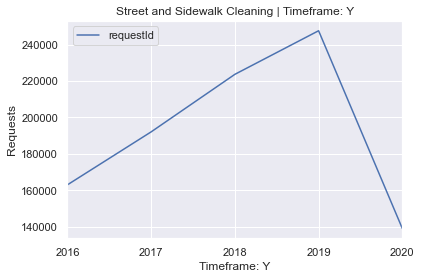

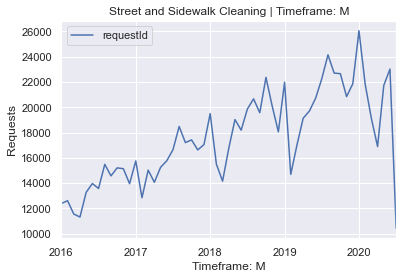

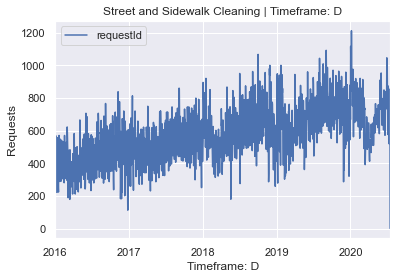

<Figure size 1008x576 with 0 Axes>

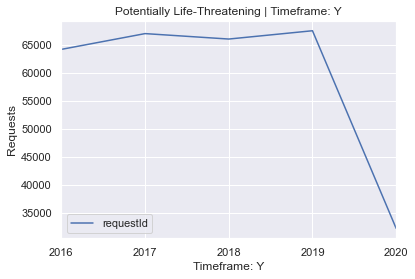

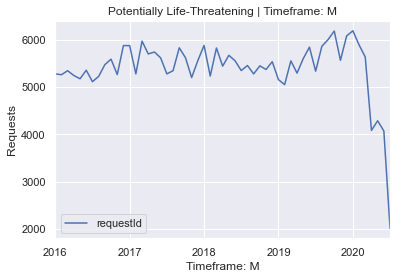

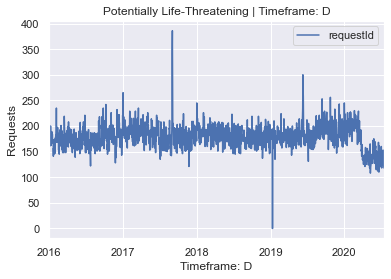

<Figure size 1008x576 with 0 Axes>

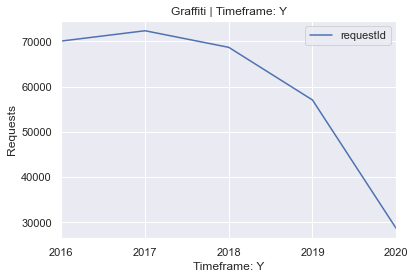

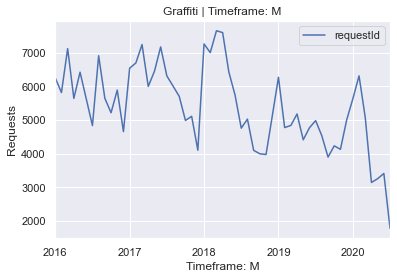

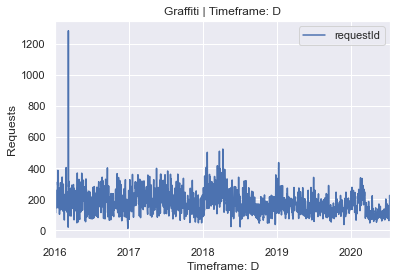

<Figure size 1008x576 with 0 Axes>

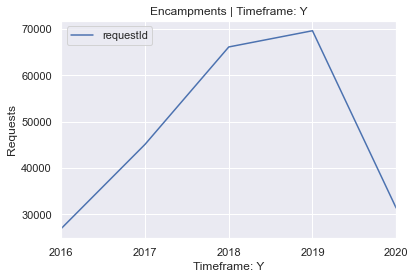

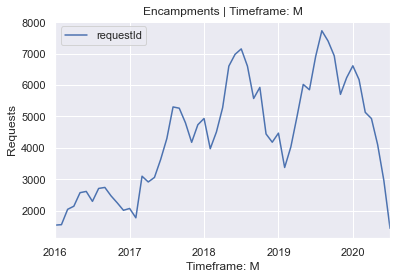

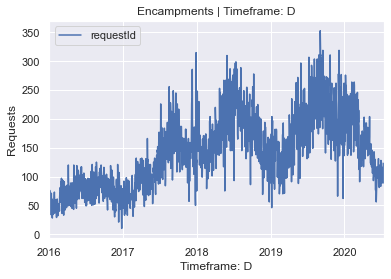

<Figure size 1008x576 with 0 Axes>

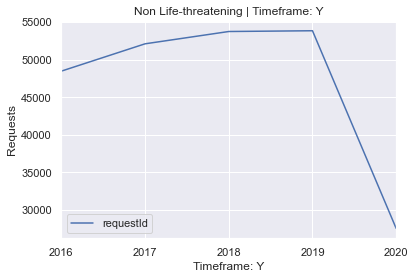

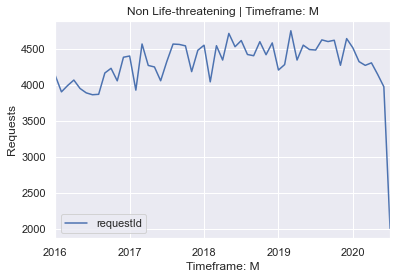

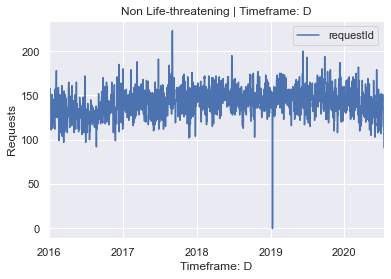

In [56]:
timelines = ['Y','M','D']
for cat in top_cat:
    plt.figure(figsize=(14,8))
    cat_title = cat
    for time in timelines:
        df_plot = df_filtered[(df_filtered.category==cat)].groupby(pd.Grouper(key='dateTime',freq=time)).agg({'requestId':'count'}).reset_index()
        df_plot.plot(x='dateTime',y='requestId')
        plt.title(str(cat) + ' | Timeframe: ' + str(time))
        plt.ylabel('Requests')
        plt.xlabel('Timeframe: '+ str(time))
        plt.show()

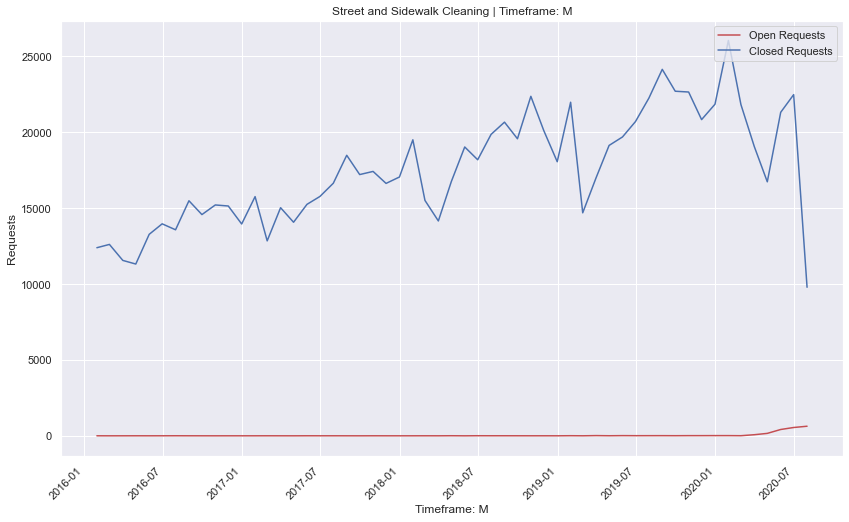

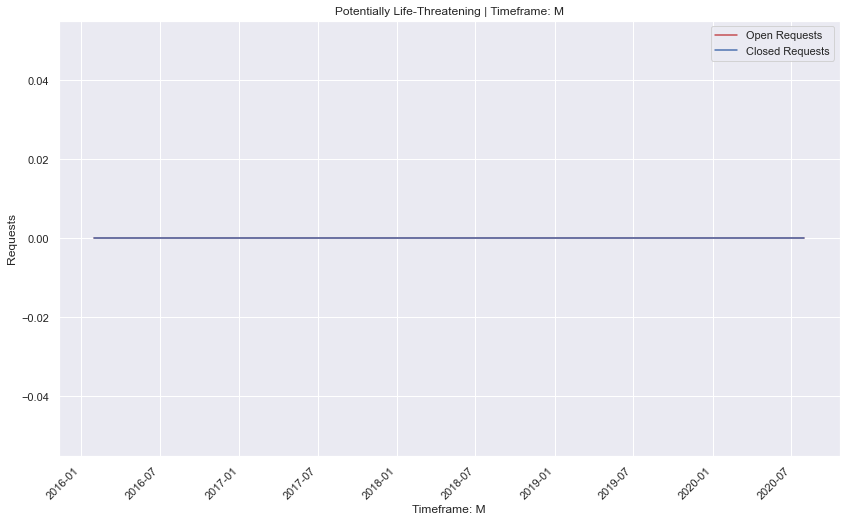

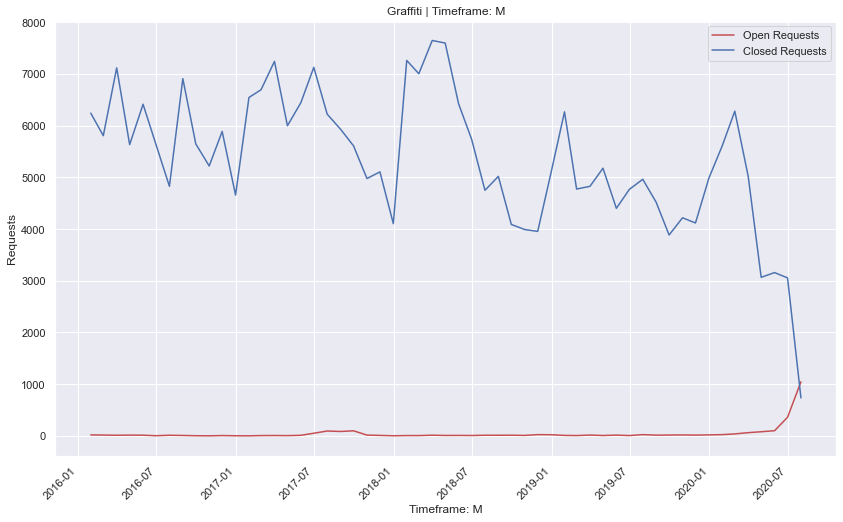

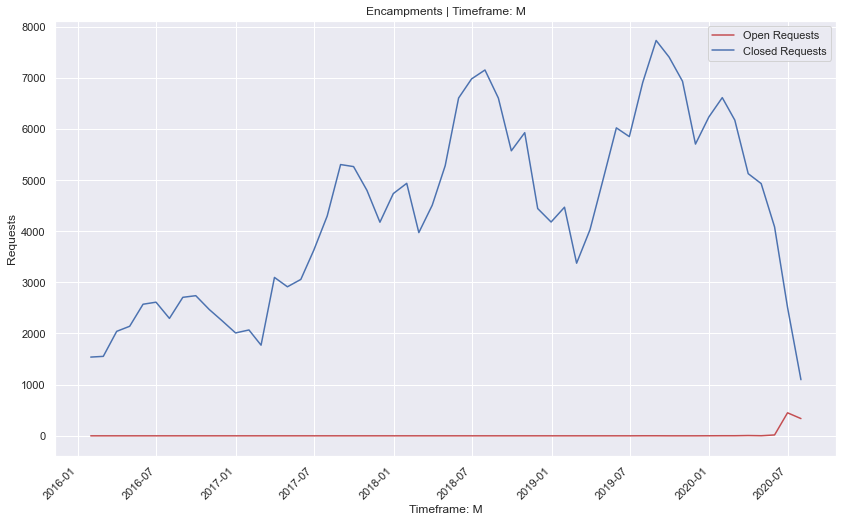

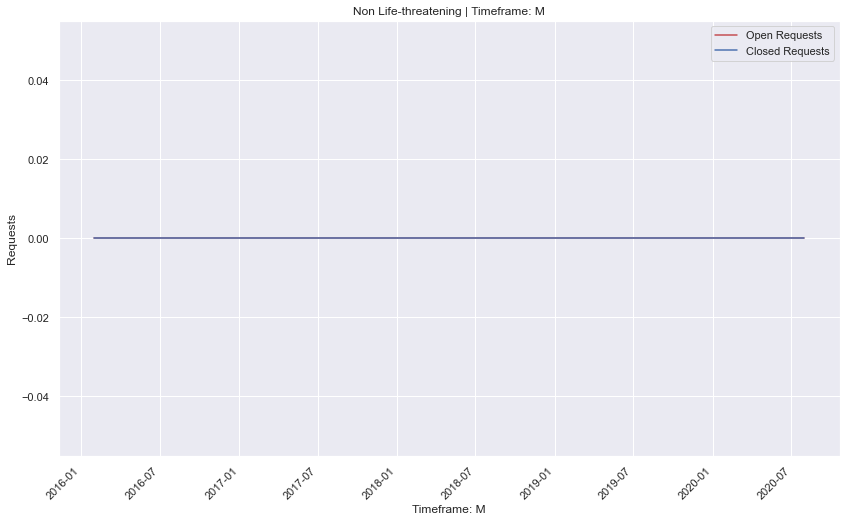

In [57]:
timeframe = 'M'
for cat in top_cat:
    plt.figure(figsize=(14,8))
    cat_title = cat
    df_plot = df_filtered[(df_filtered.category==cat)].groupby(['status',pd.Grouper(key='dateTime',freq=timeframe)]).agg({'requestId':'count'}).reset_index()
    plt.plot(df_plot[df_plot.status=='Open']['dateTime'],df_plot[df_plot.status=='Open']['requestId'], c='r', label='Open Requests')
    plt.plot(df_plot[df_plot.status=='Closed']['dateTime'],df_plot[df_plot.status=='Closed']['requestId'], c='b', label='Closed Requests')
    plt.title(str(cat) + ' | Timeframe: ' + str(timeframe))
    plt.ylabel('Requests')
    plt.xlabel('Timeframe: '+ str(timeframe))
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper right') 
    plt.show()



In [58]:
source_types = ['Email', 'Integrated Agency', 'Mail', 'Mobile/Open311', 'Other Department', 'Phone', 'Twitter', 'Web']

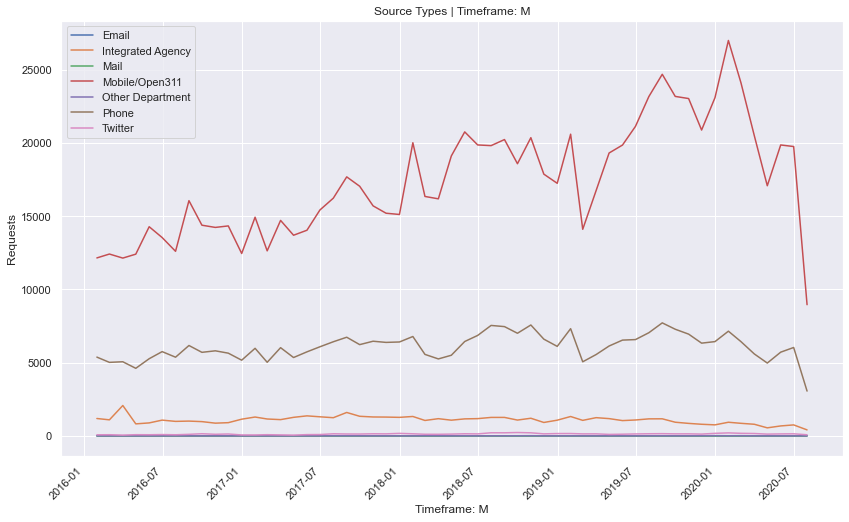

In [59]:
plt.figure(figsize=(14,8))
df_plot = df_filtered.groupby(['source',pd.Grouper(key='dateTime',freq=timeframe)]).agg({'requestId':'count'}).reset_index()
#plt.plot(df_filtered[df_filtered.source==source_types[0]]['dateTime'], df_filtered[df_filtered.source==source_types[0]]['requestId'], label=source_types[0])
#plt.plot(df_filtered[df_filtered.source==source_types[1]]['dateTime'], df_filtered[df_filtered.source==source_types[1]]['requestId'], label=source_types[1])
plt.plot(df_plot[(df_plot.source==source_types[0])]['dateTime'], df_plot[(df_plot.source==source_types[0])]['requestId'], label=source_types[0])
plt.plot(df_plot[(df_plot.source==source_types[1])]['dateTime'], df_plot[(df_plot.source==source_types[1])]['requestId'], label=source_types[1])
plt.plot(df_plot[(df_plot.source==source_types[2])]['dateTime'], df_plot[(df_plot.source==source_types[2])]['requestId'], label=source_types[2])
plt.plot(df_plot[(df_plot.source==source_types[3])]['dateTime'], df_plot[(df_plot.source==source_types[3])]['requestId'], label=source_types[3])
plt.plot(df_plot[(df_plot.source==source_types[4])]['dateTime'], df_plot[(df_plot.source==source_types[4])]['requestId'], label=source_types[4])
plt.plot(df_plot[(df_plot.source==source_types[5])]['dateTime'], df_plot[(df_plot.source==source_types[5])]['requestId'], label=source_types[5])
plt.plot(df_plot[(df_plot.source==source_types[6])]['dateTime'], df_plot[(df_plot.source==source_types[6])]['requestId'], label=source_types[6])
plt.title('Source Types | Timeframe: ' + str(timeframe))
plt.ylabel('Requests')
plt.xlabel('Timeframe: '+ str(timeframe))
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left') 
plt.show()

In [61]:
# sns.catplot(x='category', data=df_filtered, kind='count', order = top_cat)
# plt.xticks(rotation=30, ha='right')
# plt.show()

In [62]:
directory = str(os.getcwd())+'/files/'
filename = 'SanFrancisco_Neighborhoods.json'
with open(directory+filename, 'r') as json_file:
    geo_data = json.load(json_file)

In [63]:
print(json.dumps(geo_data, indent = 4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "geometries": [
                    {
                        "coordinates": [
                            [
                                [
                                    -122.391701,
                                    37.794113
                                ],
                                [
                                    -122.39198,
                                    37.793906
                                ],
                                [
                                    -122.391614,
                                    37.793571
                                ],
                                [
                                    -122.391714,
                                    37.793459
                                ],
                                [
                                    -122.388816,
                                    37.791005
                                ],


In [65]:
df_filtered['Neighborhood'] = ''


/Users/Ed/anaconda/envs/predicting-safety-events/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_filtered.head()

,requestId,dataSubtype,dateTime,category,subcategory,status,address,latitude,longitude,source,Neighborhood
0,1,911_Fire,2018-10-02 11:54:01,Potentially Life-Threatening,Medical Incident,NaN,ELM ST/FRANKLIN ST,37.781286,-122.422187,NaN,
1,2,311_All,2018-07-08 15:00:27,Street and Sidewalk Cleaning,Bulky Items,Closed,"1536 SACRAMENTO ST, SAN FRANCISCO, CA, 94109",37.791887,-122.418188,Mobile/Open311,
4,10,911_Fire,2016-10-25 18:33:20,Potentially Life-Threatening,Medical Incident,NaN,200 Block of DALEWOOD WAY,37.737953,-122.456498,NaN,
5,12,311_All,2020-04-10 12:45:00,Street and Sidewalk Cleaning,Medical Waste,Closed,"4 TURK ST, SAN FRANCISCO, CA, 94102",37.783520,-122.409487,Web,
7,19,911_Fire,2018-10-27 21:11:28,Potentially Life-Threatening,Medical Incident,NaN,2400 Block of MARKET ST,37.762464,-122.435764,NaN,


In [69]:
# get neighborhood list
neigborhood_dict = {}
for i in range(0,len(geo_data['features'])):
    temp_name = geo_data['features'][i]['properties']['neighborhood']
    temp_nhood = geo_data['features'][i]['geometry']['geometries'][0]['coordinates'][0]#['type']
    neigborhood_dict[temp_name] = np.array(temp_nhood)

In [70]:
for i, key in neigborhood_dict.items():
    print(i)

Rincon Hill
South Beach
Chinatown
Nob Hill
Ingleside
Castro
Sunset
Bayview
Portola
Lake Merced
Twin Peaks
North Beach
Tenderloin
SoMa
Mission
Financial District
Lower Pacific Heights
Taraval
Panhandle
Inner Richmond
Outer Richmond
Marina
Bayshore


In [71]:
df_filtered.iloc[10]

requestId                                           48
dataSubtype                                    311_All
dateTime                           2018-10-18 14:17:00
category                                      Graffiti
subcategory                           Graffiti on Pole
status                                          Closed
address         Intersection of 11TH AVE and FULTON ST
latitude                                       37.7732
longitude                                     -122.469
source                                  Mobile/Open311
Neighborhood                                          
Name: 18, dtype: object

In [73]:
lst = [df]
del lst

In [92]:
p.contains_points([(df_filtered.iloc[3000000,-3], df_filtered.iloc[3000000,-4])])


IndexError: single positional indexer is out-of-bounds

In [74]:
from IPython.display import clear_output

In [82]:
for i, key in neigborhood_dict.items():
    p = path.Path(key)
    print(i)
    for num in range(0,len(df)):
        clear_output(wait=True)
        if df_filtered.iloc[num,-1] != '':
            if p.contains_points([(df_filtered.iloc[num,-3], df_filtered.iloc[num,-4])]):
                df_filtered.iloc[num,-1] = i
        else:
            continue
        print('Progress: ', np.round(num/len(df)*100,2),'%')

IndexError: single positional indexer is out-of-bounds

In [93]:
df_filtered.Neighborhood.unique()

array(['', 'Rincon Hill'], dtype=object)

In [85]:
df_filtered.tail(100)

,requestId,dataSubtype,dateTime,category,subcategory,status,address,latitude,longitude,source,Neighborhood
3221409,1202614,311_All,2016-10-19 18:26:26,Street and Sidewalk Cleaning,Human or Animal Waste,Closed,Intersection of DORE ST and BRANNAN ST,37.769586,-122.407588,Phone,
3221410,1202623,311_All,2020-04-21 14:32:00,Encampments,Encampment Reports,Closed,"99 MISSOURI ST, SAN FRANCISCO, CA, 94107",37.765446,-122.396625,Mobile/Open311,
3221413,1202633,311_All,2016-08-01 14:02:56,Street and Sidewalk Cleaning,Bulky Items,Closed,"989 POST ST, SAN FRANCISCO, CA, 94109",37.786949,-122.417971,Phone,
3221415,1202636,311_All,2017-02-03 13:39:20,Street and Sidewalk Cleaning,Bulky Items,Closed,Intersection of 24TH ST and TREAT AVE,37.752504,-122.412955,Mobile/Open311,
3221416,1202642,311_All,2018-03-24 14:10:00,Street and Sidewalk Cleaning,Human or Animal Waste,Closed,Intersection of GEARY BLVD and GEARY ST,37.785549,-122.421282,Mobile/Open311,
3221417,1202648,911_Fire,2018-10-01 14:37:32,Non Life-threatening,Medical Incident,NaN,400 Block of STEVENSON ST,37.782603,-122.408539,NaN,
3221419,1202669,311_All,2019-03-19 11:19:00,Street and Sidewalk Cleaning,General Cleaning,Closed,"32 WAYNE PL, SAN FRANCISCO, CA, 94133",37.796795,-122.410933,Mobile/Open311,
3221420,1202674,311_All,2016-06-11 10:49:53,Street and Sidewalk Cleaning,Human or Animal Waste,Closed,"40 RINGOLD ST, SAN FRANCISCO, CA, 94103",37.774143,-122.410233,Web,
3221421,1202677,311_All,2020-02-08 08:38:00,Street and Sidewalk Cleaning,General Cleaning,Closed,Intersection of PAUL AVE and GOULD ST,37.722874,-122.397667,Phone,
3221422,1202688,311_All,2018-07-31 17:09:00,Street and Sidewalk Cleaning,Bulky Items,Closed,"910 SHOTWELL ST, SAN FRANCISCO, CA, 94110",37.753647,-122.415405,Phone,


In [3]:
# from ipyleaflet import Map, basemaps

# # Map centred on (60 degrees latitude et -2.2 degrees longitude)
# # Latitude, longitude
# Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
#     basemap=basemaps.Stamen.Terrain)


In [9]:
from ipyleaflet import Map, Marker, MarkerCluster


In [16]:
point = [37.7576948,-122.4726194]
#marker = ipyleaflet.Marker(location=point)
marker = Map(center=(37.8, -122.5), zoom=10)

marker.rise_on_hover=True
marker.clickable=True
zoom=10
marker
marker.add_layer(MarkerCluster(markers=[Marker(location=point)]))
marker

Map(center=[37.8, -122.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [3]:


from ipyleaflet import Map, Marker, MarkerCluster
import geopandas


cities = geopandas.read_file("zip://./geopandas_cities.zip")

m = Map(center=(42.5, -41.6), zoom=2)
m.add_layer(MarkerCluster(
    markers=[Marker(location=geolocation.coords[0][::-1]) for geolocation in cities.geometry])
    )
m



DriverError: '/vsizip/./geopandas_cities.zip' does not exist in the file system, and is not recognized as a supported dataset name.